**Data visualization test**

The following file (​link​) contains simulated data for our paysites for 2017. Each row represents a transaction (a join, a rebill, a refund, etc.) plus some attributes. Please perform the following tasks:
- Document the meaning of each column of the data set. Document also the data type and the possible values.
- Answer the following questions:
    - How many subscriptions did we acquire (initial & trial transaction types)?
        - Graph this over time (monthly based).
        - Create a graph with the split per site (without monthly evolution)
    - Calculate the contribution (income minus refunds minus affiliate payout) for each
    subscription. Rank the top 20 and the last 20 in two different tables.
    - Rank the traffic sources from highest to lowest contribution.
    - Rank the countries from highest to lowest refunds. Chart them on a map.
Submit the charts, tables and whatever ​insights​ you want to add in PDF format.
The goal of the exercise is to test your ability to manipulate data, build meaningful charts from a business perspective and how you communicate the insights you find from the data. Besides, we want to test what kind of questions you ask in order to understand a request for an analysis.


In [291]:
#Column names & data types

Transaction Id              int
Day of Transaction Date     date
Transaction Number          int
Subscription Id             int
Traffic source              varchar
Country                     varchar
Transaction Type            enum
Site                        varchar
Payout                      decimal
Revenue                     decimal

SyntaxError: invalid syntax (<ipython-input-291-9a4d81c8ad36>, line 3)

In [9]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv("paysites data - 2017.csv") 
print(df.head(3))

   Transaction Id Day of Transaction Date  Unnamed: 2  Subscription Id  \
0               1         January 1, 2017     3002665            30848   
1               2         January 1, 2017     3002666            30849   
2               3         January 1, 2017     3002664            30847   

       Traffic source        Country Transaction Type    Site  Payout  Revenue  
0   Traffic source 95  United States            trial  Site 3     0.0    28.50  
1   Traffic source 95  United States          initial  Site 3     0.0    14.28  
2  Traffic source 222  United States          initial  Site 5     0.0     0.86  


In [10]:
df.columns

Index(['Transaction Id', 'Day of Transaction Date', 'Unnamed: 2',
       'Subscription Id', 'Traffic source', 'Country', 'Transaction Type',
       'Site', 'Payout', 'Revenue'],
      dtype='object')

**Document the meaning of each column of the data set. Document also the data type and the possible values.**


In [11]:
df.rename(columns={"Transaction Id": "tr_id", "Day of Transaction Date": "tr_date",\
                 "Unnamed: 2": "acc_id", "Subscription Id": "sub_id", "Traffic source": "traffic_source",\
                 "Country" : "co", "Transaction Type": "tr_type", "Site":"site",\
                "Payout": "payout", "Revenue":"revenue"}, inplace=True)
print(df.head(5))

   tr_id          tr_date   acc_id  sub_id      traffic_source             co  \
0      1  January 1, 2017  3002665   30848   Traffic source 95  United States   
1      2  January 1, 2017  3002666   30849   Traffic source 95  United States   
2      3  January 1, 2017  3002664   30847  Traffic source 222  United States   
3      4  January 1, 2017  3002667   30850   Traffic source 73      Australia   
4      5  January 1, 2017  3002668   30851   Traffic source 95  United States   

   tr_type    site  payout  revenue  
0    trial  Site 3     0.0    28.50  
1  initial  Site 3     0.0    14.28  
2  initial  Site 5     0.0     0.86  
3  initial  Site 5    17.2   130.50  
4  initial  Site 3     0.0   119.44  


In [12]:
#How many subscriptions did we acquire (initial & trial transaction types)?
df['date'] = df['tr_date'].str.replace(" ","")
df['date'] = df['tr_date'].str.replace(",","")

df['date'] = pd.to_datetime(df['date'], format='%B %d %Y').dt.strftime('%Y-%m-%d')
df['month'] = pd.to_datetime(df['date'], format='%Y-%m-%d').dt.strftime('%m')

print(df.head(5))


   tr_id          tr_date   acc_id  sub_id      traffic_source             co  \
0      1  January 1, 2017  3002665   30848   Traffic source 95  United States   
1      2  January 1, 2017  3002666   30849   Traffic source 95  United States   
2      3  January 1, 2017  3002664   30847  Traffic source 222  United States   
3      4  January 1, 2017  3002667   30850   Traffic source 73      Australia   
4      5  January 1, 2017  3002668   30851   Traffic source 95  United States   

   tr_type    site  payout  revenue        date month  
0    trial  Site 3     0.0    28.50  2017-01-01    01  
1  initial  Site 3     0.0    14.28  2017-01-01    01  
2  initial  Site 5     0.0     0.86  2017-01-01    01  
3  initial  Site 5    17.2   130.50  2017-01-01    01  
4  initial  Site 3     0.0   119.44  2017-01-01    01  


In [13]:
df_trial = df[df['tr_type'] == 'trial'].groupby('month').agg(cnt_trial = ('month', 'count'))
df_initial = df[df['tr_type'] == 'initial'].groupby('month').agg(cnt_initial = ('month', 'count'))
df_concat = pd.concat([df_trial, df_initial], axis=1, sort=False)
print(df_concat)


       cnt_trial  cnt_initial
month                        
01          2305        10225
02          2189        12780
03          2569         8559
04          2368         9883
05          2455        12917
06          2356         7396
07          2372        12010
08          3889         8382
09          4181         7969
10          2678        10270
11          3130        21059
12          2697        18202



print(df_concat)
df_concat.plot(figsize=(16, 6), linewidth=2.5)
sns.set(font_scale=1.4)
plt.xlabel("Year-Month", labelpad=15)
plt.ylabel("Clickthrough Rate %", labelpad=15)
plt.title("Daily Overall Clickthrough Rate by group type", y=1.02, fontsize=16);

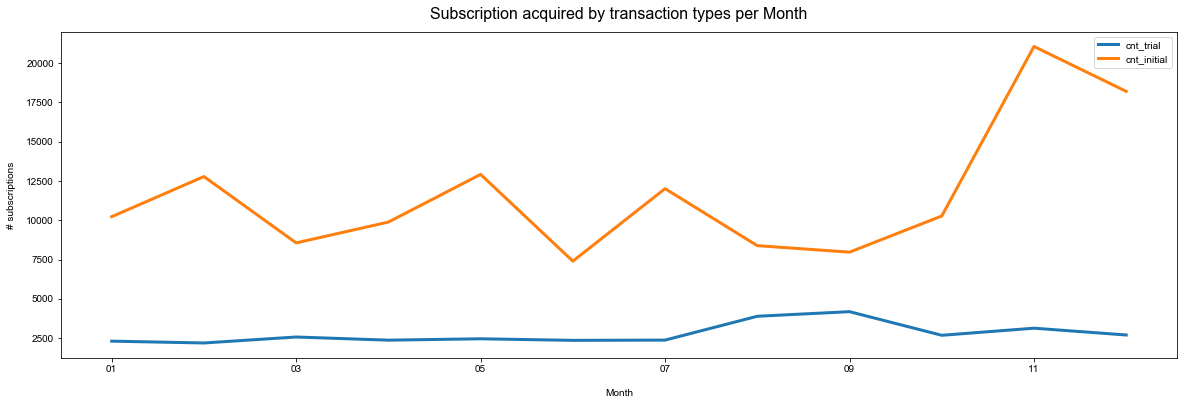

In [14]:
df_concat.plot(figsize=(20, 6), linewidth=3)
sns.set(font_scale=1.4)
plt.xlabel("Month", labelpad=15)
plt.ylabel("# subscriptions", labelpad=10)
plt.title("Subscription acquired by transaction types per Month", y=1.02, fontsize=16);

In [15]:
df_site = df.groupby('month').agg(site = ('site', 'count'))
print(df_site)

        site
month       
01     37677
02     39641
03     39181
04     39322
05     43150
06     38950
07     43513
08     43133
09     43108
10     42968
11     54645
12     56955


In [16]:
df_site = df.filter(['tr_id','date','site','tr_type',], axis=1)
print(df_site)
df_site_trial = df_site[df_site['tr_type'] == 'trial'].groupby('site').agg(cnt_trial = ('site', 'count'))
df_site_initial = df_site[df_site['tr_type'] == 'initial'].groupby('site').agg(cnt_initial = ('site', 'count'))
df_site_concat = pd.concat([df_site_trial, df_site_initial], axis=1, sort=False)

print(df_site_concat)
#df_trial = df[df['Transaction Type'] == 'trial'].groupby('Year-Month').agg(cnt_trial = ('Year-Month', 'count'))


         tr_id        date    site  tr_type
0            1  2017-01-01  Site 3    trial
1            2  2017-01-01  Site 3  initial
2            3  2017-01-01  Site 5  initial
3            4  2017-01-01  Site 5  initial
4            5  2017-01-01  Site 3  initial
...        ...         ...     ...      ...
522330  522331  2017-12-31  Site 2  initial
522331  522332  2017-12-31  Site 1  initial
522332  522333  2017-12-31  Site 2  initial
522333  522334  2017-12-31  Site 1    trial
522334  522335  2017-12-31  Site 1  initial

[522335 rows x 4 columns]
        cnt_trial  cnt_initial
site                          
Site 1      19646        58246
Site 2       1777        10119
Site 3      11075        32990
Site 5        691        38269


        cnt_trial  cnt_initial
site                          
Site 1      19646        58246
Site 2       1777        10119
Site 3      11075        32990
Site 5        691        38269


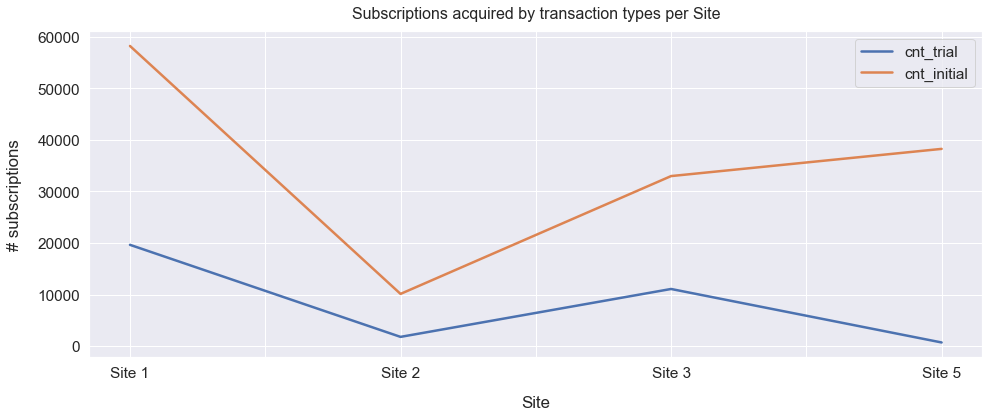

In [227]:
print(df_site_concat)
df_site_concat.plot(figsize=(16, 6), linewidth=2.5)
sns.set(font_scale=1.4)
plt.xlabel("Site", labelpad=15)
plt.ylabel("# subscriptions", labelpad=15)
plt.title("Subscriptions acquired by transaction types per Site", y=1.02, fontsize=16);

**Calculate the contribution (income minus refunds minus affiliate payout) for each subscription. 
Rank the top 20 and the last 20 in two different tables.**

In [256]:
#print(df.head(3))
df_diff = df.groupby('sub_id')\
            .agg(sum_payout = ('payout','count'), sum_revenue = ('revenue','count'))\

df_diff['diff'] = df_diff['sum_payout'] - df_diff['sum_revenue']
print(df_diff.head(3))
#df_diff = df_diff.sort_values(by =['diff'], ascending=False)
df_diff = df_diff.sort_values(by =['diff'], ascending = False)
print(df_diff)

#df_trial = df[df['tr_type'] == 'trial'].groupby('month').agg(cnt_trial = ('month', 'count'))


        sum_payout  sum_revenue  diff
sub_id                               
1                4            4     0
2                4            4     0
3                4            4     0
        sum_payout  sum_revenue  diff
sub_id                               
1                4            4     0
135797           4            4     0
135799           1            1     0
135800           5            5     0
135801           1            1     0
...            ...          ...   ...
67906            1            1     0
67907            1            1     0
67908            1            1     0
67909            2            2     0
203707           1            1     0

[203707 rows x 3 columns]


In [282]:

#print(df.head(3))
df_test3 = df[df['sub_id'] == 49070].filter(['tr_id','date','acc_id','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)

print(df_test3)

         tr_id        date  sub_id    site  tr_type  payout  revenue
52371    52372  2017-02-12   49070  Site 3  initial     0.0    11.70
95776    95777  2017-03-14   49070  Site 3   rebill     0.0    10.90
95777    95778  2017-03-14   49070  Site 3   rebill     0.0    10.10
95778    95779  2017-03-14   49070  Site 3   rebill     0.0     8.50
95782    95783  2017-03-14   49070  Site 3   rebill     0.0    11.40
95786    95787  2017-03-14   49070  Site 3   rebill     0.0     9.10
95793    95794  2017-03-14   49070  Site 3   rebill     0.0    10.80
95801    95802  2017-03-14   49070  Site 3   rebill     0.0     8.70
95806    95807  2017-03-14   49070  Site 3   rebill     0.0     8.20
95809    95810  2017-03-14   49070  Site 3   rebill     0.0     8.40
99337    99338  2017-03-18   49070  Site 3   credit     0.0    -9.51
99338    99339  2017-03-18   49070  Site 3   credit     0.0   -10.09
99339    99340  2017-03-18   49070  Site 3   credit     0.0   -11.39
99340    99341  2017-03-18   49070

In [17]:
#Calculate the contribution (income minus refunds minus affiliate payout) for each
#    subscription. Rank the top 20 and the last 20 in two different tables.
    
print(df.tr_type.unique())

['trial' 'initial' 'conversion' 'rebill' 'void' 'credit' 'chargeback']


Questions:
1) What does it represent the 3rd column?
    Since it it's the same with the sub_id I assumne it's an id related to billings.
    I named it acc_id. Is it correct?

2) What are the currencies of the payouts & revenue?

3) What are the definitions for the following terms:
 'conversion','void','credit','chargeback' ?
 
4) Which transaction types are consider refund?

5) Why do we have a revenue when transaction type is trial?

6) How is it possible that the chargeback is higher that the initial?  See example?
         tr_id        date  sub_id    site     tr_type  payout  revenue
279171  279172  2017-07-29  120377  Site 1     initial     0.0     21.0
300826  300827  2017-08-15  120377  Site 1  chargeback     0.0    -93.0



In [19]:

#print(df.head(3))
df_test3 = df[df['sub_id'] == 63532].filter(['tr_id','date','acc_id','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)

print(df_test3)


         tr_id        date   acc_id  sub_id    site     tr_type  payout  \
94693    94694  2017-03-14  3182712   63532  Site 1       trial     0.0   
95857    95858  2017-03-14  3182712   63532  Site 1  conversion     0.0   
134237  134238  2017-04-14  3182712   63532  Site 1      rebill     0.0   
172731  172732  2017-05-14  3182712   63532  Site 1      rebill     0.0   

        revenue  
94693      8.20  
95857      8.80  
134237    11.02  
172731    35.08  


In [20]:
#print(df.head(3))
df_test3 = df[df['sub_id'] == 41081].filter(['tr_id','date','acc_id','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)

print(df_test3)


       tr_id        date   acc_id  sub_id    site     tr_type  payout  revenue
26372  26373  2017-01-24  3064900   41081  Site 1     initial   14.02     15.3
68333  68334  2017-02-24  3064900   41081  Site 1      rebill   16.04     12.0
96355  96356  2017-03-15  3064900   41081  Site 1  chargeback  -28.58     -8.3
96356  96357  2017-03-15  3064900   41081  Site 1  chargeback  -25.98    -10.7


In [287]:
#print(df.head(3))
df_test3 = df[df['sub_id'] == 63695].filter(['tr_id','date','acc_id','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)

print(df_test3)


       tr_id        date  sub_id    site  tr_type  payout  revenue
95886  95887  2017-03-14   63695  Site 5  initial     0.0     10.7
97196  97197  2017-03-15   63695  Site 5     void     0.0    -10.1


In [21]:
df_test3 = df[df['sub_id'] == 25104].filter(['tr_id','date','acc_id','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)
print(df_test3)

       tr_id        date   acc_id  sub_id    site     tr_type  payout  revenue
97360  97361  2017-03-16  2937766   25104  Site 3      credit  -32.86     -9.4
98212  98213  2017-03-17  2937766   25104  Site 3  chargeback  -14.25     -9.7


In [22]:
df_test3 = df[df['sub_id'] == 25104].filter(['tr_id','date','acc_id','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)
print(df_test3)

       tr_id        date   acc_id  sub_id    site     tr_type  payout  revenue
97360  97361  2017-03-16  2937766   25104  Site 3      credit  -32.86     -9.4
98212  98213  2017-03-17  2937766   25104  Site 3  chargeback  -14.25     -9.7


In [23]:

df_test3 = df[df['sub_id'] == 65887].filter(['tr_id','date','acc_id','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)
print(df_test3)

         tr_id        date   acc_id  sub_id    site tr_type  payout  revenue
102146  102147  2017-03-20  3196950   65887  Site 3   trial    36.4     9.36
103101  103102  2017-03-21  3196950   65887  Site 3    void   -44.8   -67.80


In [31]:

df_test3 = df[df['sub_id'] == 120377].filter(['tr_id','date','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)
print(df_test3)



         tr_id        date  sub_id    site     tr_type  payout  revenue
279171  279172  2017-07-29  120377  Site 1     initial     0.0     21.0
300826  300827  2017-08-15  120377  Site 1  chargeback     0.0    -93.0


In [30]:
df_test3 = df[df['sub_id'] == 115754].filter(['tr_id','date','acc_id','sub_id','tr_source','site', 'tr_type', 'payout', 'revenue'], axis=1)
print(df_test3)


         tr_id        date   acc_id  sub_id    site  tr_type  payout  revenue
259447  259448  2017-07-15  3491102  115754  Site 5  initial     0.0     10.0
300836  300837  2017-08-15  3491102  115754  Site 5   rebill     0.0     33.9
345663  345664  2017-09-15  3491102  115754  Site 5   rebill     0.0     11.0


In [ ]:

                 
"""
df_res_pos= df2[df2['result_position'].notnull()] \
                .groupby('result_position')        \
                .agg(cnt_result =('result_position','count')) \
                .sort_values(by=['cnt_result'], ascending=False)
print(df_res_pos.head(3))


 .sort_values(by=[''], ascending=False)
df_by_day = df.filter(['date','result_position'], axis=1)
df_by_day= df_by_day[df_by_day['result_position'].notnull()]

df_by_day = df_by_day\
                .groupby(['date','result_position'])\
                .agg(cnt_result =('result_position','count'))\
                .sort_values(by=['cnt_result'], ascending=False)
df_by_day.reset_index()               
df_by_day['row_number'] = df_by_day.groupby(['date']).cumcount()
df_by_day = df_by_day[df_by_day['row_number'] == 0]
print(df_by_day)
"""

In [ ]:
41081